In [130]:
import os
import pandas as pd
import pickle
from experiments_lab.experiment_results_data import ExperimentResults
from modeling.pomdp_problem.domain.observation import ObservationStackAttemptResult


def result_table(csv_file_path):
    experiments_folder = "/home/clair01/PycharmProjects/voa-pomdp/experiments_lab/experiments/4blocks"

    # Load the CSV data
    df = pd.read_csv(csv_file_path)

    # Initialize lists to store accumulated reward, episode length, and num_pickups for each row
    accumulated_rewards = []
    episode_lengths = []
    num_pickups_list = []

    # Iterate through the rows of the DataFrame
    for index, row in df.iterrows():
        # Extract necessary columns
        belief_idx = row['belief_idx']
        state_idx = row['state_idx']
        help_config_idx_local = row['help_config_idx_local']
        conducted_datetime_stamp = row['conducted_datetime_stamp']

        # Define the path to the folder and the .pkl file
        folder_path = os.path.join(experiments_folder, conducted_datetime_stamp)
        pkl_file_path = os.path.join(folder_path, 'results.pkl')  # Assuming the pkl file name

        res = ExperimentResults.load(pkl_file_path)

        # Check if the .pkl file exists
        if res is not None:
            accumulated_rewards.append(res.total_reward)
            episode_lengths.append(len(res.rewards))
            num_pickups_list.append(
                sum([1 for obs in res.observations if isinstance(obs, ObservationStackAttemptResult) and obs.is_object_picked])
            )
        else:
            # If the pkl file doesn't exist, append default values for reward, length, and pickups
            accumulated_rewards.append(0)
            episode_lengths.append(0)
            num_pickups_list.append(0)

    # Add the accumulated rewards, episode lengths, and num_pickups to the DataFrame
    df['accumulated_rewards'] = accumulated_rewards
    df['episode_lengths'] = episode_lengths
    df['num_pickups'] = num_pickups_list

    return df



In [131]:
#build a result table for pouct with 2000 depth policy

# Define file paths
csv_file_path = "/home/clair01/PycharmProjects/voa-pomdp/experiments_lab/configurations/experiments_4_blocks.csv"

experiments_4_blocks_2000_policy_result = result_table(csv_file_path)

# Save to CSV
experiments_4_blocks_2000_policy_result.to_csv('experiments_4_blocks_2000_policy_result.csv')

In [132]:
#build a result table for pouct with 20 depth policy

# Define file paths
csv_file_path = "/home/clair01/PycharmProjects/voa-pomdp/experiments_lab/configurations/experiments_4_blocks_shallow_policy.csv"

experiments_4_blocks_shallow_policy_result = result_table(csv_file_path)

experiments_4_blocks_shallow_policy_result.to_csv('experiments_4_blocks_shallow_policy_result.csv')


In [133]:
#build a result table for handmade policy with 20 depth policy

# Define file paths
csv_file_path = "/home/clair01/PycharmProjects/voa-pomdp/experiments_lab/configurations/experiments_4_blocks_handmade_policy.csv"

eexperiments_4_blocks_handmade_policy_result = result_table(csv_file_path)

eexperiments_4_blocks_handmade_policy_result.to_csv('experiments_4_blocks_handmade_policy_result.csv')

In [134]:
# Save results to output directory
def save_results(df, filename):
    output_dir = 'analyze_results_output'
    os.makedirs(output_dir, exist_ok=True)
    df.to_csv(f"{output_dir}/{filename}.csv")

1. for each state,belief compute the value difference for each helping action (new table: belief, state, helping-action, value diff)
2. for each belief and helping action, compute the mean value difference over state and also the std
3. plot histogram of the std's (there are n_beliefs x n_helping_actions stds)
    that will let us know how much variance over initial states

4. compute the mean accumulated reward over all experiments for each helping configs (including no help).
    it would be useful to plot 2-4 images of detections from experiments for each  helping config, next to the accumulated reward

5. add to the tables above another column: episode length, and for each helping config compute how many experiments ended in less than 20 steps.
   plot histogram where x-axis is episode length and y-axis is mean accumulated reward + confidence interval
   that would be useful to make sure that episodes that ended early were generally more successful although blocks may fall from the tower

6. bar plot of mean value difference for each helping config, for each policy (3 bars for 3 policies 1 near each other)

7.  bar plot of mean value difference for each helping config, mean over all policies, but different bar for each of the two initial belief
   that will let us know how different were the results for different initial beliefs and let us know if we need to do more experiments for some beliefs
8. times of pick up (in ipad)

creat a csv by column

In [135]:
def save_by_help_config(file_path, column_name='help_config_idx_local', output_folder= 'output_csv'):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Create an output directory
    os.makedirs(output_folder, exist_ok=True)

    # Get unique values from the specified column
    unique_values = df[column_name].unique()

    # Save each subset into a separate CSV file
    for value in unique_values:
        filtered_df = df[df[column_name] == value]
        output_file_path = os.path.join(output_folder, f'{file_path}_{column_name}_{value}.csv')
        filtered_df.to_csv(output_file_path, index=False)
        print(f'Saved: {output_file_path}')


file_paths = [
    'experiments_4_blocks_2000_policy_result.csv',
    'experiments_4_blocks_handmade_policy_result.csv',
    'experiments_4_blocks_shallow_policy_result.csv'
]

for file_path in file_paths:
    save_by_help_config(file_path)

Saved: output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_-1.csv
Saved: output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_0.csv
Saved: output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_1.csv
Saved: output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_2.csv
Saved: output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_3.csv
Saved: output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_4.csv
Saved: output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_5.csv
Saved: output_csv/experiments_4_blocks_handmade_policy_result.csv_help_config_idx_local_-1.csv
Saved: output_csv/experiments_4_blocks_handmade_policy_result.csv_help_config_idx_local_0.csv
Saved: output_csv/experiments_4_blocks_handmade_policy_result.csv_help_config_idx_local_1.csv
Saved: output_csv/experiments_4_blocks_handmade_policy_result.csv_help_config_idx_loca

take the mean of the accumulated rewards fot each policy

In [136]:
def read_and_average(file_path):
    data = pd.read_csv(file_path)
    return data['accumulated_rewards'].mean()

file_paths = [
    'experiments_4_blocks_2000_policy_result.csv',
    'experiments_4_blocks_handmade_policy_result.csv',
    'experiments_4_blocks_shallow_policy_result.csv'
]

averages = {file_path: read_and_average(file_path) for file_path in file_paths}
for file_path, average in averages.items():
    print(f"Average accumulated reward for {file_path}:")
    print(f"{average}")

Average accumulated reward for experiments_4_blocks_2000_policy_result.csv:
2.075665032543661
Average accumulated reward for experiments_4_blocks_handmade_policy_result.csv:
2.1524496576900103
Average accumulated reward for experiments_4_blocks_shallow_policy_result.csv:
2.0781404569724855


take the mean of the accumulated rewards fot each policy without helping

In [137]:
def read_and_average(file_path):
    data = pd.read_csv(file_path)
    return data['accumulated_rewards'].mean()

file_paths = [
    'output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_-1.csv',
    'output_csv/experiments_4_blocks_handmade_policy_result.csv_help_config_idx_local_-1.csv',
    'output_csv/experiments_4_blocks_shallow_policy_result.csv_help_config_idx_local_-1.csv'
]

averages = {file_path: read_and_average(file_path) for file_path in file_paths}
for file_path, average in averages.items():
    print(f"Average accumulated reward for {file_path}:")
    print(f"{average}")


Average accumulated reward for output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_-1.csv:
0.7104086550130514
Average accumulated reward for output_csv/experiments_4_blocks_handmade_policy_result.csv_help_config_idx_local_-1.csv:
1.34575302066993
Average accumulated reward for output_csv/experiments_4_blocks_shallow_policy_result.csv_help_config_idx_local_-1.csv:
0.7819238903730709


1) for each state,belief compute the value difference for each helping action (new table: belief, state, helping-action, value diff)


In [138]:
import pandas as pd

# Define file paths
file_paths = [
    'experiments_4_blocks_2000_policy_result.csv',
    'experiments_4_blocks_handmade_policy_result.csv',
    'experiments_4_blocks_shallow_policy_result.csv'
]

# Process each file
for file_path in file_paths:
    df = pd.read_csv(file_path)
    baseline_df = df[df['help_config_idx_local'] == -1]

    # Initialize a list to store the results
    results = []

    # Process each unique state and belief combination
    for _, baseline_row in baseline_df.iterrows():
        belief_idx = baseline_row['belief_idx']
        state_idx = baseline_row['state_idx']
        baseline_reward = baseline_row['accumulated_rewards']

        # Filter rows with the same state and belief but different help_config_idx_local
        filtered_rows = df[(df['state_idx'] == state_idx) & (df['belief_idx'] == belief_idx) & (df['help_config_idx_local'] != -1)]

        for _, row in filtered_rows.iterrows():
            value_diff = row['accumulated_rewards'] - baseline_reward
            # Store each row in the list
            results.append({
                'belief_idx': belief_idx,
                'state_idx': state_idx,
                'help_config_idx_local': row['help_config_idx_local'],
                'value_diff': value_diff
            })

    # Convert the list to a DataFrame
    result_df = pd.DataFrame(results, columns=['belief_idx', 'state_idx', 'help_config_idx_local', 'value_diff'])

    base_file_path = os.path.splitext(file_path)[0]
    new_file_path = file_path.replace('.csv', '_value_difference')
    save_results(result_df, new_file_path)

    # Print the result for each file
    print(f"Value difference saved to analyze_results_output/{file_path}:")


Value difference saved to analyze_results_output/experiments_4_blocks_2000_policy_result.csv:
Value difference saved to analyze_results_output/experiments_4_blocks_handmade_policy_result.csv:
Value difference saved to analyze_results_output/experiments_4_blocks_shallow_policy_result.csv:


2) for each belief and helping action, compute the mean value difference over state and also the std

In [139]:
import pandas as pd

def calculate_statistics(file_path):
    data = pd.read_csv(file_path)

    # Group by belief_idx and help_config_idx_local and calculate mean and std of value_diff
    stats = data.groupby(['belief_idx', 'help_config_idx_local'])['value_diff'].agg(['mean', 'std']).reset_index()

    return stats

# Define file paths
file_paths = [
    'experiments_4_blocks_2000_policy_result_value_difference.csv',
    'experiments_4_blocks_handmade_policy_result_value_difference.csv',
    'experiments_4_blocks_shallow_policy_result_value_difference.csv'
]

# Process each file and save the results
for file_path in file_paths:
    full_path = f'analyze_results_output/{file_path}'
    stats = calculate_statistics(full_path)
    output_path = file_path.replace('.csv', '_stats')
    save_results(stats, output_path)
    print(f'Statistics saved to analyze_results_output/{output_path}')


Statistics saved to analyze_results_output/experiments_4_blocks_2000_policy_result_value_difference_stats
Statistics saved to analyze_results_output/experiments_4_blocks_handmade_policy_result_value_difference_stats
Statistics saved to analyze_results_output/experiments_4_blocks_shallow_policy_result_value_difference_stats


3) plot histogram of the std's (there are n_beliefs x n_helping_actions stds)
    that will let us know how much variance over initial states

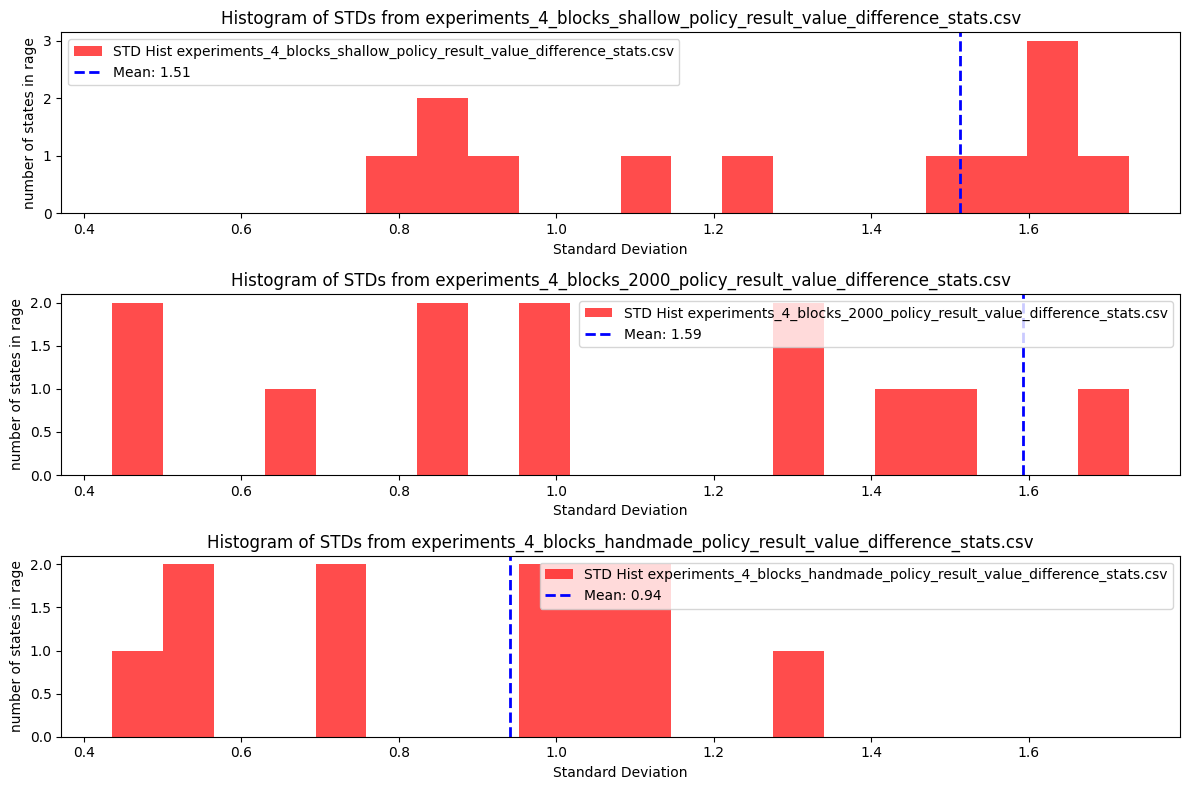

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

# List of file paths
file_paths = [
    'analyze_results_output/experiments_4_blocks_shallow_policy_result_value_difference_stats.csv',
    'analyze_results_output/experiments_4_blocks_2000_policy_result_value_difference_stats.csv',
    'analyze_results_output/experiments_4_blocks_handmade_policy_result_value_difference_stats.csv'
]

# Initialize a figure for the histograms
plt.figure(figsize=(12, 8))

# Collect all data to find a global range for the standard deviation
all_data = pd.concat([pd.read_csv(file) for file in file_paths])
global_min, global_max = all_data['std'].min(), all_data['std'].max()

# Plot histograms for each file
for idx, file_path in enumerate(file_paths, start=1):
    # Load data
    data = pd.read_csv(file_path)
    
    # Calculate mean
    mean_value = data['mean'].mean()

    # Plot
    plt.subplot(3, 1, idx)
    plt.hist(data['std'], color='r' ,bins=20, alpha=0.7, label=f'STD Hist {file_path.split("/")[-1]}', range=(global_min, global_max))
    
    # Add mean line
    plt.axvline(mean_value, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    
    plt.xlabel('Standard Deviation')
    plt.ylabel('number of states in rage')
    plt.title(f'Histogram of STDs from {file_path.split("/")[-1]}')
    plt.legend()

plt.tight_layout()
plt.show()


4) compute the mean accumulated reward over all experiments for each helping configs (including no help).
    it would be useful to plot 2-4 images of detections from experiments for each  helping config, next to the accumulated reward

   help_config_idx_local      mean       std
0                     -1  0.946029  0.532630
1                      0  2.324493  0.851676
2                      1  2.916008  1.168271
3                      2  2.030316  0.836513
4                      3  2.492616  1.207799
5                      4  2.628327  0.984533
6                      5  1.376806  0.881723


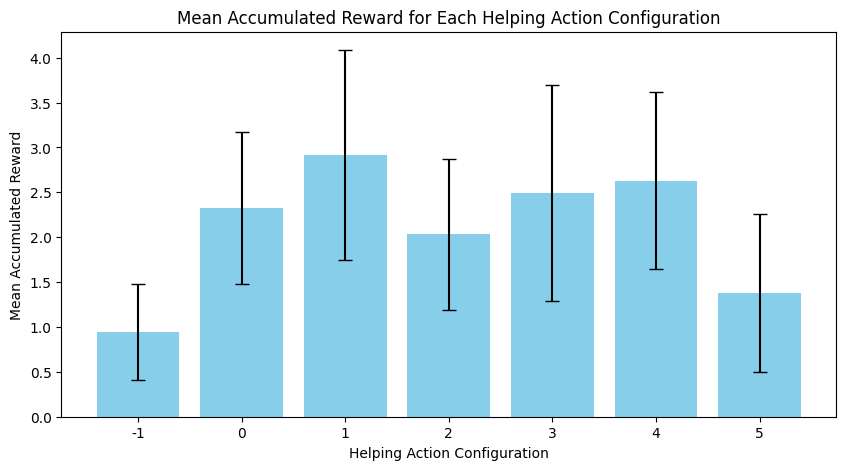

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
handmade_data = pd.read_csv('experiments_4_blocks_2000_policy_result.csv')
data_2000 =  pd.read_csv('experiments_4_blocks_handmade_policy_result.csv')
shallow = pd.read_csv('experiments_4_blocks_shallow_policy_result.csv')


combined_data = pd.concat([handmade_data, data_2000, shallow], ignore_index=True)

# Calculate the mean accumulated reward for each helping configuration
mean_accumulated_rewards = combined_data.groupby('help_config_idx_local')['accumulated_rewards'].agg(['mean', 'std']).reset_index()

# Print the results
print(mean_accumulated_rewards)

# Plotting the mean accumulated rewards
plt.figure(figsize=(10, 5))
plt.bar(mean_accumulated_rewards['help_config_idx_local'].astype(str), mean_accumulated_rewards['mean'], yerr=mean_accumulated_rewards['std'], 
   capsize = 5, color='skyblue')
plt.xlabel('Helping Action Configuration')
plt.ylabel('Mean Accumulated Reward')
plt.title('Mean Accumulated Reward for Each Helping Action Configuration')
plt.show()


6) bar plot of mean value difference for each helping config, for each policy (3 bars for 3 policies 1 near each other)

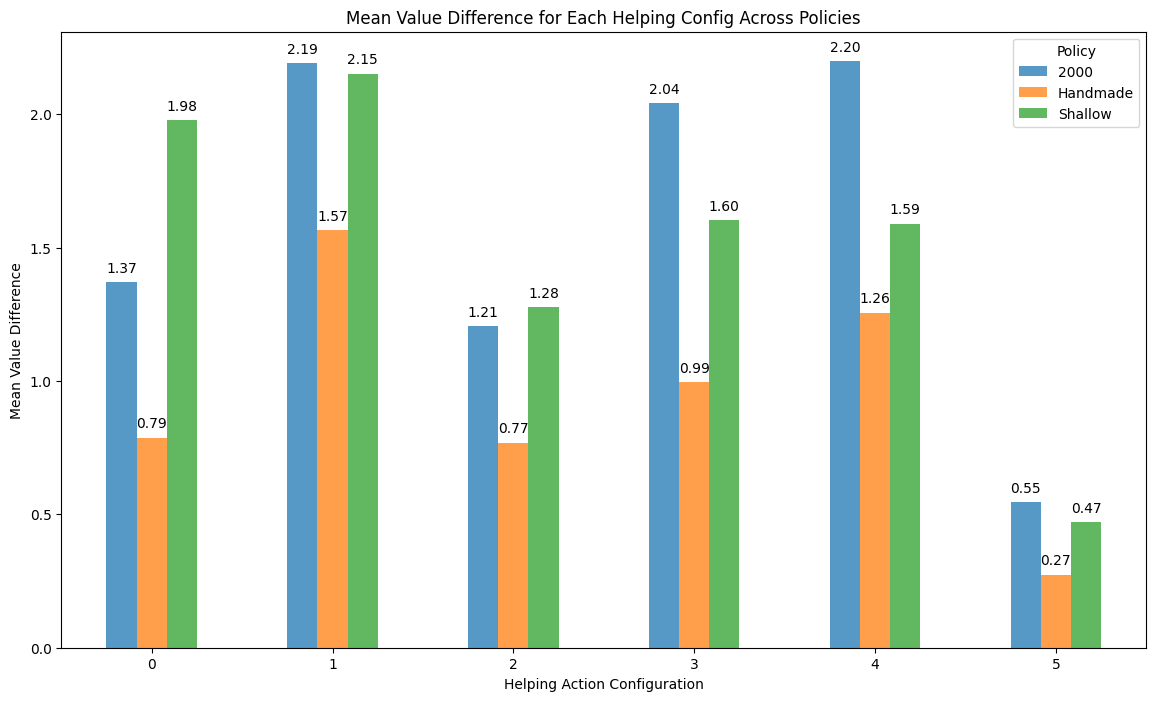

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data loading - replace these with actual paths and data

data_handmade = pd.read_csv('analyze_results_output/experiments_4_blocks_handmade_policy_result_value_difference.csv')
data_2000 =  pd.read_csv('analyze_results_output/experiments_4_blocks_2000_policy_result_value_difference.csv')
data_shallow = pd.read_csv('analyze_results_output/experiments_4_blocks_shallow_policy_result_value_difference.csv')

# Adding a policy column to distinguish the data
data_handmade['policy'] = 'Handmade'
data_2000['policy'] = '2000'
data_shallow['policy'] = 'Shallow'

# Combine the datasets
combined_data = pd.concat([data_handmade, data_2000, data_shallow])

# Group by help configuration and policy to calculate mean value differences
grouped_data = combined_data.groupby(['help_config_idx_local', 'policy'])['value_diff'].mean().unstack()

# Plotting
ax = grouped_data.plot(kind='bar', figsize=(14, 8), alpha=0.75, rot=0)
plt.xlabel('Helping Action Configuration')
plt.ylabel('Mean Value Difference')
plt.title('Mean Value Difference for Each Helping Config Across Policies')
plt.legend(title='Policy')

# Add values on top of bars for better readability
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

7) bar plot of mean value difference for each helping config, mean over all policies, but different bar for each of the two initial belief
   that will let us know how different were the results for different initial beliefs and let us know if we need to do more experiments for some beliefs

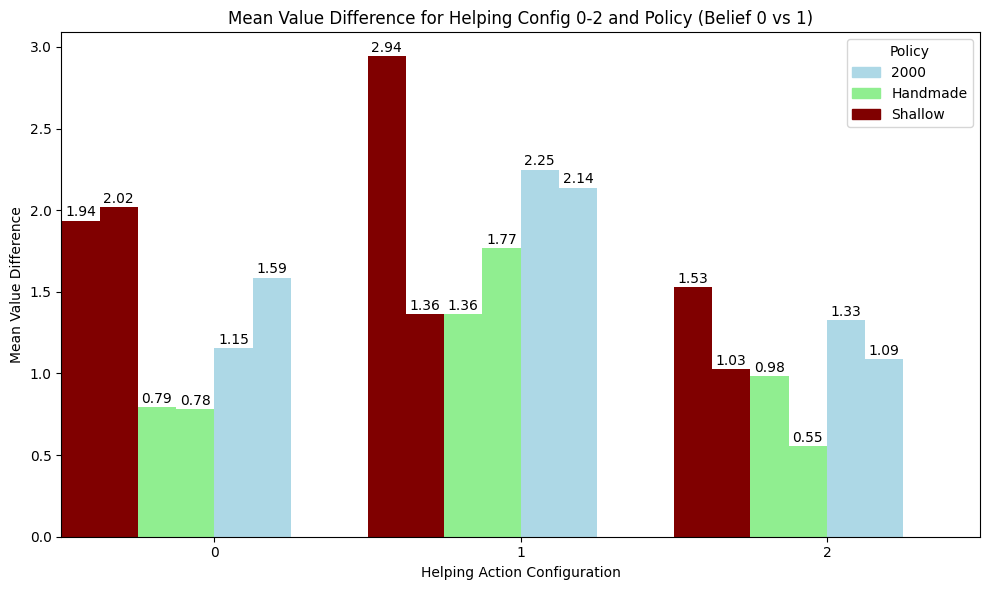

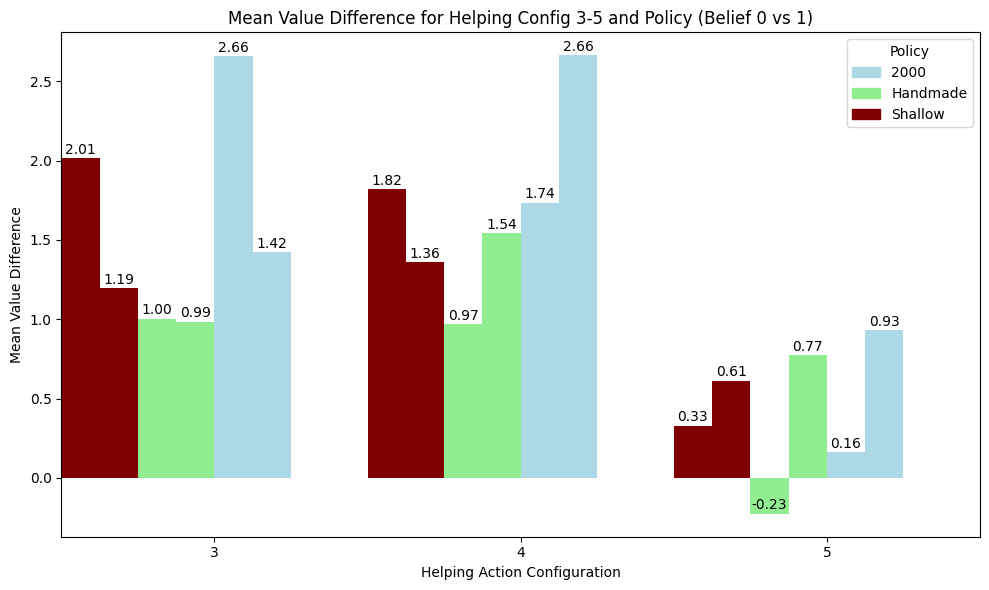

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data loading - replace these with actual paths and data
data_handmade = pd.read_csv('analyze_results_output/experiments_4_blocks_handmade_policy_result_value_difference.csv')
data_2000 = pd.read_csv('analyze_results_output/experiments_4_blocks_2000_policy_result_value_difference.csv')
data_shallow = pd.read_csv('analyze_results_output/experiments_4_blocks_shallow_policy_result_value_difference.csv')

# Adding a policy column to distinguish the data
data_handmade['policy'] = 'Handmade'
data_2000['policy'] = '2000'
data_shallow['policy'] = 'Shallow'

# Combine the datasets
combined_data = pd.concat([data_handmade, data_2000, data_shallow])

# Group by help configuration, policy, and belief to calculate mean value differences
grouped_data = combined_data.groupby(['help_config_idx_local', 'policy', 'belief_idx'])['value_diff'].mean().unstack()

# Rearrange the data so that each policy has belief_idx 0 and 1 side by side
grouped_data = grouped_data.stack().unstack(level='belief_idx')

# Define custom colors for each policy
colors = {
    'Handmade': 'lightgreen',
    'Shallow': 'maroon',
    '2000': 'lightblue'
}

# Split the grouped data into two parts (help_config_idx_local 0-2 and 3-5)
data_part1 = grouped_data.loc[[0, 1, 2]]
data_part2 = grouped_data.loc[[3, 4, 5]]

def plot_data(data, title):
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed

    # Adjusting positions to reduce space between configurations
    for i, policy in enumerate(data.index.levels[1]):
        data.xs(policy, level='policy').plot(
            kind='bar',
            ax=ax,
            position=i ,  # Adjust the position
            width=0.25,  # You can also reduce this width if needed
            color=colors[policy],
            align='center'
        )

    # Labeling
    plt.xlabel('Helping Action Configuration')
    plt.ylabel('Mean Value Difference')
    plt.title(title)
    
    # Fixing legend manually to match colors and labels
    handles = [plt.Rectangle((0, 0), 0.5, 0.5, color=colors['2000']),
               plt.Rectangle((0, 0), 0.5, 0.5, color=colors['Handmade']),
               plt.Rectangle((0, 0), 0.5, 0.5, color=colors['Shallow'])]
    ax.legend(handles, ['2000', 'Handmade', 'Shallow'], title='Policy')
    
    # Rotate x-axis labels vertically
    plt.xticks(rotation= 0)
    
    # Set x-axis limits to ensure all bars are shown
    num_configs = len(data.index.levels[0])  # Number of helping configurations
    ax.set_xlim(-0.5, 3 - 0.5)  # Adjust x limits based on the number of configs

    # Add values on top of bars for better readability
    for p in ax.patches:
        height = p.get_height()
        if height != 0:
            ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 6), textcoords='offset points')
    plt.tight_layout()
    plt.show()

# Plot for helping config 0-2
plot_data(data_part1, 'Mean Value Difference for Helping Config 0-2 and Policy (Belief 0 vs 1)')

# Plot for helping config 3-5
plot_data(data_part2, 'Mean Value Difference for Helping Config 3-5 and Policy (Belief 0 vs 1)')


In [144]:
def read_and_average(file_path):
    data = pd.read_csv(file_path)
    return data['num_pickups'].mean()

file_paths = [
    'experiments_4_blocks_2000_policy_result.csv',
    'experiments_4_blocks_handmade_policy_result.csv',
    'experiments_4_blocks_shallow_policy_result.csv'
]

averages = {file_path: read_and_average(file_path) for file_path in file_paths}
for file_path, average in averages.items():
    print(f"The average number of block that picked up for {file_path}:")
    print(f"{average}")


The average number of block that picked up for experiments_4_blocks_2000_policy_result.csv:
2.6714285714285713
The average number of block that picked up for experiments_4_blocks_handmade_policy_result.csv:
2.6285714285714286
The average number of block that picked up for experiments_4_blocks_shallow_policy_result.csv:
2.6142857142857143


In [145]:
def read_and_average(file_path):
    data = pd.read_csv(file_path)
    return data['num_pickups'].mean()

file_paths = [
    'output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_-1.csv',
    'output_csv/experiments_4_blocks_handmade_policy_result.csv_help_config_idx_local_-1.csv',
    'output_csv/experiments_4_blocks_shallow_policy_result.csv_help_config_idx_local_-1.csv'
]

averages = {file_path: read_and_average(file_path) for file_path in file_paths}
for file_path, average in averages.items():
    print(f"The average number of block that picked up for without help {file_path}:")
    print(f"{average}")


The average number of block that picked up for without help output_csv/experiments_4_blocks_2000_policy_result.csv_help_config_idx_local_-1.csv:
1.1
The average number of block that picked up for without help output_csv/experiments_4_blocks_handmade_policy_result.csv_help_config_idx_local_-1.csv:
1.6
The average number of block that picked up for without help output_csv/experiments_4_blocks_shallow_policy_result.csv_help_config_idx_local_-1.csv:
1.2
